### Libraries

In [59]:
# Required libraries
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load Data

In [60]:
# Load the dataset
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")
filepath = os.path.join(path, "Life Expectancy Data.csv")
df = pd.read_csv(filepath, low_memory=False)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Cleaning

In [61]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [62]:
# Drop unnecessary columns
df.drop(columns=["Country", "Status", "Year"], inplace=True)

# Handle missing values by filling with the mean
df.fillna(df.mean(), inplace=True)

In [78]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


### Data Preprocessing

In [65]:
X = df.drop(columns=["Life expectancy "])
y = df["Life expectancy "].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=36
)

#### Linear Regression

In [66]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Prediction
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Absolute Error: {mae}")
print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R^2 Score: {r2}")

Linear Regression - Mean Absolute Error: 3.071310366802024
Linear Regression - Mean Squared Error: 16.570754718340453
Linear Regression - R^2 Score: 0.8165392108101811


In [83]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f"Linear Regression - (Train)Mean Absolute Error: {mae}")
print(f"Linear Regression - (Train)Mean Squared Error: {mse}")
print(f"Linear Regression - (Train)R^2 Score: {r2}")

Linear Regression - (Train)Mean Absolute Error: 3.0022282525622024
Linear Regression - (Train)Mean Squared Error: 16.499363120167715
Linear Regression - (Train)R^2 Score: 0.8174339095120349


In [68]:
model.coef_, model.intercept_

(array([ -2.53859394,  10.95947978,   0.47743855,   0.31269061,
         -0.30852843,  -0.13888151,   0.83398782, -11.28741514,
          0.70447726,   0.19886817,   0.89331338,  -2.43941014,
          0.45025619,   0.128799  ,  -0.28690122,  -0.02343495,
          1.22010181,   2.24240438]),
 np.float64(69.21355452659803))

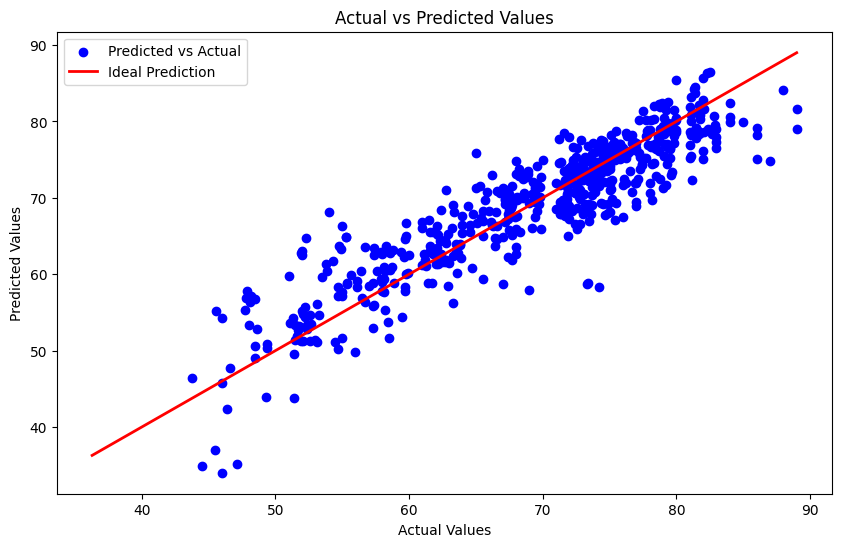

In [69]:
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot(
    [y.min(), y.max()], [y.min(), y.max()], color="red", lw=2, label="Ideal Prediction"
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

### Polynomial Regression

In [80]:
# Model Training
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Model Prediction
y_train_pred_poly = poly_model.predict(X_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

# Model Evaluation for Polynomial Regression
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"Polynomial Regression - Mean Absolute Error: {mae_poly}")
print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - R^2 Score: {r2_poly}")

Polynomial Regression - Mean Absolute Error: 2.0326493354496784
Polynomial Regression - Mean Squared Error: 8.872271082027392
Polynomial Regression - R^2 Score: 0.8975905497305768


In [82]:
mae_poly = mean_absolute_error(y_train_poly, y_train_pred_poly)
mse_poly = mean_squared_error(y_train_poly, y_train_pred_poly)
r2_poly = r2_score(y_train_poly, y_train_pred_poly)
print(f"Polynomial Regression - (Train)Mean Absolute Error: {mae_poly}")
print(f"Polynomial Regression - (Train)Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - (Train)R^2 Score: {r2_poly}")

Polynomial Regression - (Train)Mean Absolute Error: 1.918557532314422
Polynomial Regression - (Train)Mean Squared Error: 6.839577116926687
Polynomial Regression - (Train)R^2 Score: 0.9250736513445919


In [71]:
poly.n_output_features_

190

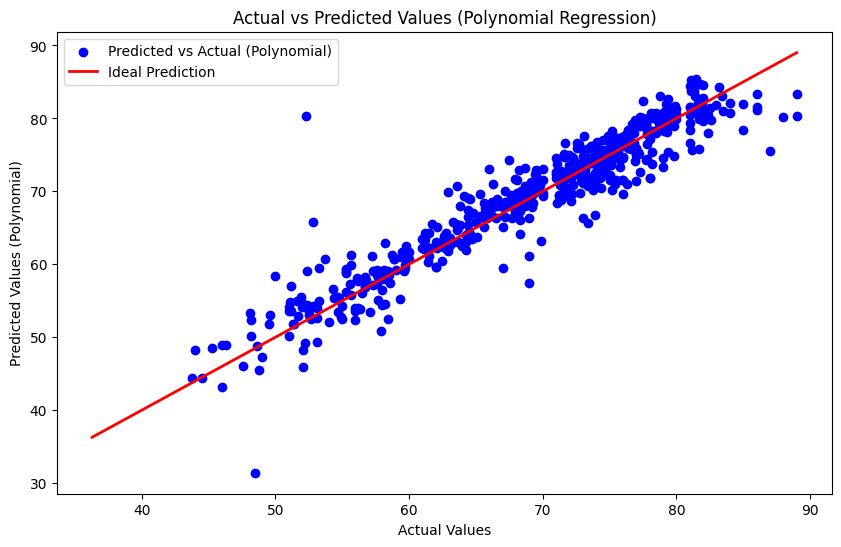

In [73]:
# Visualizing the polynomial regression results
plt.figure(figsize=(10, 6))
plt.scatter(
    y_test_poly, y_pred_poly, color="blue", label="Predicted vs Actual (Polynomial)"
)
plt.plot(
    [y.min(), y.max()], [y.min(), y.max()], color="red", lw=2, label="Ideal Prediction"
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Polynomial)")
plt.title("Actual vs Predicted Values (Polynomial Regression)")
plt.legend()
plt.show()

In [74]:
# Saving the predictions
predictions = pd.DataFrame(
    {
        "Actual": y_test,
        "Predicted (Linear)": y_pred,
        "Predicted (Polynomial)": y_pred_poly,
    }
)
predictions
# predictions.to_csv('predictions.csv', index=False)

,Actual,Predicted (Linear),Predicted (Polynomial)
0,82.1,78.599673,71.532521
1,48.0,53.395532,77.382883
2,73.6,67.834988,75.242802
3,81.8,80.817753,78.021926
4,73.2,69.190926,55.471385
...,...,...,...
583,68.6,70.148789,59.505590
584,79.5,79.309840,74.030204
585,68.9,73.558775,63.274768
586,72.3,74.456295,71.538864


In [75]:
# Linear Regression Vs Polynomial Regression Comparison matrix in MAE, MSE, and R^2
comparison = pd.DataFrame(
    {
        "Model": ["Linear Regression", "Polynomial Regression"],
        "MAE": [mae, mae_poly],
        "MSE": [mse, mse_poly],
        "R^2": [r2, r2_poly],
    }
)
comparison

,Model,MAE,MSE,R^2
0,Linear Regression,3.002228,16.499363,0.817434
1,Polynomial Regression,2.032649,8.872271,0.897591


### Save Model

In [76]:
import joblib

joblib.dump(model, "linear_regression_model.pkl")
joblib.dump(poly_model, "polynomial_regression_model.pkl")

['polynomial_regression_model.pkl']

In [77]:
# Making predictions with the model
# y_pred = model.predict(X_test)
# y_pred_poly = poly_model.predict(X_test_poly)